In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import cv2

In [3]:
img_path = '../../data/commaai/train_bags_2/1/106_0run1.png'
image = imageio.imread(img_path)

In [5]:
ang_file = pd.read_csv('../../data/commaai/train_bags_2/1/angles_filename.csv', header = None)
ang_file.columns = ['file', 'angle', 'tr_angle']

In [7]:
label = ang_file.loc[ang_file['file'] == img_path, 'angle']#[19]

In [8]:
a_rad = label / 180. * np.pi + np.pi / 2

In [9]:
ang_dens = pd.DataFrame({'angle': np.linspace(-70,90,5000), 'density': np.linspace(0,0.1,5000) })

In [10]:
def plot_density(ang_dens, c, r):
    ang_dens['angle_rad'] = ang_dens['angle'].apply(lambda x: x / 180. * np.pi + np.pi / 2)
    ang_dens['t'] = ang_dens['angle_rad'].apply(lambda x: (c[0] + np.cos(x) * r, c[1] - np.sin(x) * r))
    for i in range(0, ang_dens['t'].shape[0]):
        t = ang_dens['t'][i]
        dens = ang_dens['density'][i]
        plt.plot((c[0], t[0]), (c[1], t[1]), 'dodgerblue', alpha = dens)

TypeError: cannot convert the series to <class 'int'>

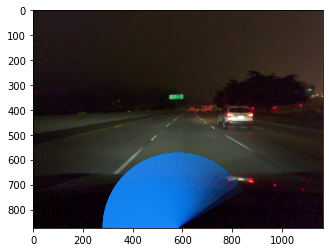

In [11]:
pred = 30
figure, ax = plt.figure(), plt.gca()
#circle1 = plt.Circle((0.2, 0.5), 0.5, color='r')
#ax.add_patch(circle1)
#plt.imshow(img)
ax.imshow(image)
a_rad = label / 180. * np.pi + np.pi / 2
c, r = (582,873), 300 #center, radius
plot_density(ang_dens, c, r)
t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
plt.plot((c[0], t[0]), (c[1], t[1] + 30), 'w', alpha = 1)
a_rad = pred / 180. * np.pi + np.pi / 2
c, r = (582,873), 300 #center, radius
t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
plt.plot((c[0], t[0]), (c[1] , t[1] + 30), 'r', alpha = 1)
plt.gca().add_artist(plt.Circle(c, r, edgecolor='dodgerblue', facecolor='k'))
plt.text(c[0] - 550 , c[1] - 800, 'steering angle'.format(label), color='w')
plt.text(c[0] - 550 , c[1] - 750, 'true: {:0.1f}$^\circ$'.format(label), color='w')
plt.text(c[0] - 550 , c[1] - 700, 'predicted: {:0.1f}$^\circ$'.format(pred), color='r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
figure.savefig('example_steering_visualization.pdf', format='pdf', dpi=900)

In [12]:
ang_dens

,angle,density,angle_rad,t
0,-60.000000,0.00000,0.523599,"(1448.0254037844386, 373.0)"
1,-59.975995,0.00002,0.524018,"(1447.815846377398, 372.6372114537391)"
2,-59.951990,0.00004,0.524437,"(1447.6061369938434, 372.2745107360762)"
3,-59.927986,0.00006,0.524856,"(1447.3962756705855, 371.9118979106767)"
4,-59.903981,0.00008,0.525275,"(1447.1862624444611, 371.54937304118954)"
...,...,...,...,...
4995,59.903981,0.09992,2.616318,"(-283.1862624444608, 371.5493730411892)"
4996,59.927986,0.09994,2.616737,"(-283.39627567058517, 371.91189791067626)"
4997,59.951990,0.09996,2.617156,"(-283.6061369938433, 372.2745107360762)"
4998,59.975995,0.09998,2.617575,"(-283.81584637739763, 372.63721145373876)"
